In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#글씨 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
dc = pd.read_csv("daily_crowd_data_2023.csv")
dc.head() 

,날짜,요일,홈,방문,구장,관중수
0,2023/04/01,토,키움,한화,고척,"16,000"
1,2023/04/01,토,SSG,KIA,문학,"23,000"
2,2023/04/01,토,KT,LG,수원,"18,700"
3,2023/04/01,토,두산,롯데,잠실,"23,750"
4,2023/04/01,토,삼성,NC,대구,"24,000"


In [12]:
dc['관중수'] = dc['관중수'].apply(lambda x: str(x).replace(',', ''))

In [13]:
# float 변환
dc['관중수'] = dc['관중수'].astype(float)

print(dc)

             날짜 요일    홈   방문  구장      관중수
0    2023/04/01  토   키움   한화  고척  16000.0
1    2023/04/01  토  SSG  KIA  문학  23000.0
2    2023/04/01  토   KT   LG  수원  18700.0
3    2023/04/01  토   두산   롯데  잠실  23750.0
4    2023/04/01  토   삼성   NC  대구  24000.0
..          ... ..  ...  ...  ..      ...
715  2023/10/16  월   한화   롯데  대전  12000.0
716  2023/10/16  월  KIA   NC  광주   5251.0
717  2023/10/16  월   두산  SSG  잠실  15850.0
718  2023/10/17  화  KIA   NC  광주  10175.0
719  2023/10/17  화  SSG   두산  문학  21007.0

[720 rows x 6 columns]


In [6]:
# 한화 행들만
hdc = dc[(dc['홈'] == '한화') | (dc['방문'] == '한화')]

print(hdc)

             날짜 요일   홈   방문  구장      관중수
0    2023/04/01  토  키움   한화  고척  16000.0
5    2023/04/02  일  키움   한화  고척  11562.0
10   2023/04/04  화  삼성   한화  대구   5936.0
16   2023/04/06  목  삼성   한화  대구   6525.0
21   2023/04/07  금  한화  SSG  대전  10415.0
..          ... ..  ..  ...  ..      ...
694  2023/10/09  월  NC   한화  창원   8716.0
697  2023/10/10  화  NC   한화  창원   7342.0
709  2023/10/14  토  한화   롯데  대전   9153.0
712  2023/10/15  일  한화   롯데  대전   9840.0
715  2023/10/16  월  한화   롯데  대전  12000.0

[144 rows x 6 columns]


In [7]:
hdc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 715
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      144 non-null    object 
 1   요일      144 non-null    object 
 2   홈       144 non-null    object 
 3   방문      144 non-null    object 
 4   구장      144 non-null    object 
 5   관중수     144 non-null    float64
dtypes: float64(1), object(5)
memory usage: 7.9+ KB


In [3]:
dcc = pd.read_csv("daily_crowd_data.csv")
dcc.head()

,날짜,요일,홈,방문,구장,관중수
0,2024/03/23,토,LG,한화,잠실,"23,750"
1,2024/03/23,토,SSG,롯데,문학,"23,000"
2,2024/03/23,토,NC,두산,창원,"17,891"
3,2024/03/23,토,KT,삼성,수원,"18,700"
4,2024/03/23,토,KIA,키움,광주,"20,500"


In [4]:
dcc['관중수'] = dcc['관중수'].apply(lambda x: str(x).replace(',', ''))

In [5]:
# float변환
dcc['관중수'] = dcc['관중수'].astype(float)

print(dcc)

             날짜 요일    홈   방문  구장      관중수
0    2024/03/23  토   LG   한화  잠실  23750.0
1    2024/03/23  토  SSG   롯데  문학  23000.0
2    2024/03/23  토   NC   두산  창원  17891.0
3    2024/03/23  토   KT   삼성  수원  18700.0
4    2024/03/23  토  KIA   키움  광주  20500.0
..          ... ..  ...  ...  ..      ...
568  2024/08/18  일  SSG   한화  문학  22545.0
569  2024/08/18  일   LG  KIA  잠실  23750.0
570  2024/08/18  일   KT   두산  수원  12164.0
571  2024/08/18  일   NC   삼성  창원  12328.0
572  2024/08/18  일   롯데   키움  사직  20740.0

[573 rows x 6 columns]


In [6]:
# 한화 행들만
hdcc = dcc[(dcc['홈'] == '한화') | (dcc['방문'] == '한화')]

print(hdcc)

             날짜 요일    홈  방문  구장      관중수
0    2024/03/23  토   LG  한화  잠실  23750.0
5    2024/03/24  일   LG  한화  잠실  23750.0
9    2024/03/26  화  SSG  한화  문학  10541.0
14   2024/03/27  수  SSG  한화  문학  11005.0
19   2024/03/28  목  SSG  한화  문학  11755.0
..          ... ..  ...  ..  ..      ...
551  2024/08/14  수   한화  LG  대전  11884.0
555  2024/08/15  목   한화  LG  대전  12000.0
558  2024/08/16  금  SSG  한화  문학  21057.0
563  2024/08/17  토  SSG  한화  문학  23000.0
568  2024/08/18  일  SSG  한화  문학  22545.0

[113 rows x 6 columns]


In [7]:
# 주말과 평일
# 평일 데이터
hdcc_work = hdcc[hdcc['요일'].isin(['월', '화', '수', '목', '금'])]

# 주말 데이터
hdcc_week = hdcc[hdcc['요일'].isin(['토', '일'])]

print(hdcc_work)

print(hdcc_week)

평일 데이터:
             날짜 요일    홈  방문  구장      관중수
9    2024/03/26  화  SSG  한화  문학  10541.0
14   2024/03/27  수  SSG  한화  문학  11005.0
19   2024/03/28  목  SSG  한화  문학  11755.0
23   2024/03/29  금   한화  KT  대전  12000.0
38   2024/04/02  화   한화  롯데  대전  12000.0
..          ... ..  ...  ..  ..      ...
535  2024/08/09  금   한화  키움  대전  11302.0
547  2024/08/13  화   한화  LG  대전  11748.0
551  2024/08/14  수   한화  LG  대전  11884.0
555  2024/08/15  목   한화  LG  대전  12000.0
558  2024/08/16  금  SSG  한화  문학  21057.0

[77 rows x 6 columns]
주말 데이터:
             날짜 요일    홈   방문  구장      관중수
0    2024/03/23  토   LG   한화  잠실  23750.0
5    2024/03/24  일   LG   한화  잠실  23750.0
28   2024/03/30  토   한화   KT  대전  12000.0
33   2024/03/31  일   한화   KT  대전  12000.0
55   2024/04/06  토   키움   한화  고척  16000.0
60   2024/04/07  일   키움   한화  고척  16000.0
85   2024/04/13  토   한화  KIA  대전  12000.0
90   2024/04/14  일   한화  KIA  대전  12000.0
115  2024/04/20  토   한화   삼성  대전  12000.0
121  2024/04/21  일   한화   삼성  대전  12000.0
146  20

In [8]:
hdcc_week.set_index('날짜', inplace=True)

In [9]:
hdcc_week = hdcc_week.copy()

# 변화율 계산
hdcc_week['변화율'] = hdcc_week['관중수'].pct_change()

In [25]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
hdata['롤링 변화율'] = hdata['변화율'].rolling(window=3).mean()

In [26]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
hdcc_week['관중수 변화율'] = hdcc_week['변화율'].rolling(window=3).mean()

주말 롤링(순위 자르기 X)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21060\2574197252.py:33: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 레이아웃 조정
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21060\2574197252.py:33: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 레이아웃 조정
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21060\2574197252.py:33: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 레이아웃 조정
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21060\2574197252.py:33: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 레이아웃 조정
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21060\2574197252.py:33: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 레이아웃 조정
C:\Users\Publi

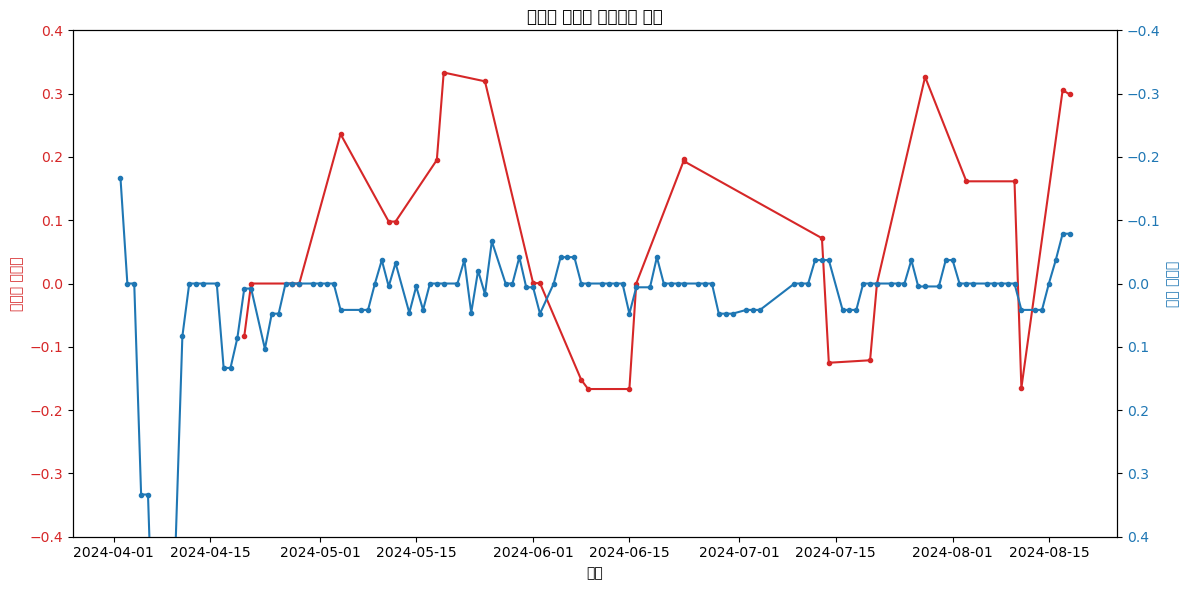

In [27]:
# datetime으로
hdata.index = pd.to_datetime(hdata.index, errors='coerce')
hdcc_week.index = pd.to_datetime(hdcc_week.index, errors='coerce')


# 결측치 제거
hdata = hdata.dropna(subset=['롤링 변화율'])
hdcc_week = hdcc_week.dropna(subset=['관중수 변화율'])

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 관중수 변화율
color = 'tab:red'
ax1.set_xlabel('날짜')
ax1.set_ylabel('관중수 변화율', color=color)
ax1.plot(hdcc_week.index, hdcc_week['관중수 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdcc_week 관중수 변화율')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0.4, 0.4)

# 순위 변화율
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('순위 변화율', color=color)
ax2.plot(hdata.index, hdata['롤링 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdata 순위 변화율')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0.4, 0.4)
ax2.invert_yaxis()  # Y축 뒤집음

plt.title('순위와 관중수 변화율의 비교')
fig.tight_layout()

plt.show() #한국어 오류

In [28]:
# 주말 선택
hdata.head()

,순위,팀명,경기,승,패,무,승률,게임차,최근10경기,연속,홈,방문,변화율,롤링 변화율
일자,,,,,,,,,,,,,,
2024-04-02,1,한화,9,7,2,0,0.778,0.0,7승0무2패,1패,3-0-1,4-0-1,0.0,-0.166667
2024-04-03,1,한화,9,7,2,0,0.778,0.0,7승0무2패,1패,3-0-1,4-0-1,0.0,0.000000
2024-04-04,1,한화,10,8,2,0,0.800,0.0,8승0무2패,1승,4-0-1,4-0-1,0.0,0.000000
2024-04-05,2,한화,11,8,3,0,0.727,0.5,8승0무2패,1패,4-0-1,4-0-2,1.0,0.333333
2024-04-06,2,한화,12,8,4,0,0.667,0.5,7승0무3패,2패,4-0-1,4-0-3,0.0,0.333333


In [29]:
# hdcc_week = hdata 필터링
filtered_hdata = hdata.loc[hdata.index.intersection(hdcc_week.index)]

print(filtered_hdata)

            순위  팀명   경기   승   패  무     승률   게임차  최근10경기  연속        홈       방문  \
2024-04-20   7  한화   23  11  12  0  0.478   6.0  3승0무7패  1패    5-0-5    6-0-7   
2024-04-21   7  한화   24  11  13  0  0.458   6.0  3승0무7패  2패    5-0-6    6-0-7   
2024-04-27   8  한화   29  12  17  0  0.414   8.0  3승0무7패  1승    6-0-7   6-0-10   
2024-04-28   8  한화   30  12  18  0  0.400   9.0  2승0무8패  1패    6-0-8   6-0-10   
2024-05-04   9  한화   35  14  21  0  0.400   9.0  3승0무7패  1패   7-0-10   7-0-11   
2024-05-11   9  한화   39  15  24  0  0.385   9.5  3승0무7패  1패   8-0-11   7-0-13   
2024-05-12   8  한화   40  16  24  0  0.400   9.0  4승0무6패  1승   9-0-11   7-0-13   
2024-05-18   9  한화   45  16  28  1  0.364  12.0  2승1무7패  4패   9-1-13   7-0-15   
2024-05-19   9  한화   46  17  28  1  0.378  12.0  3승1무6패  1승   9-1-13   8-0-15   
2024-05-25   8  한화   51  21  29  1  0.420   9.0  5승0무5패  2승  11-1-14  10-0-15   
2024-06-01   8  한화   56  24  31  1  0.436  10.5  7승0무3패  2패  14-1-14  10-0-17   
2024-06-02   8  한화   57  24 

In [30]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
filtered_hdata['롤링 변화율'] = filtered_hdata['변화율'].rolling(window=3).mean()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21060\1028609483.py:33: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 레이아웃 조정
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21060\1028609483.py:33: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 레이아웃 조정
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21060\1028609483.py:33: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 레이아웃 조정
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21060\1028609483.py:33: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 레이아웃 조정
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21060\1028609483.py:33: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 레이아웃 조정
C:\Users\Publi

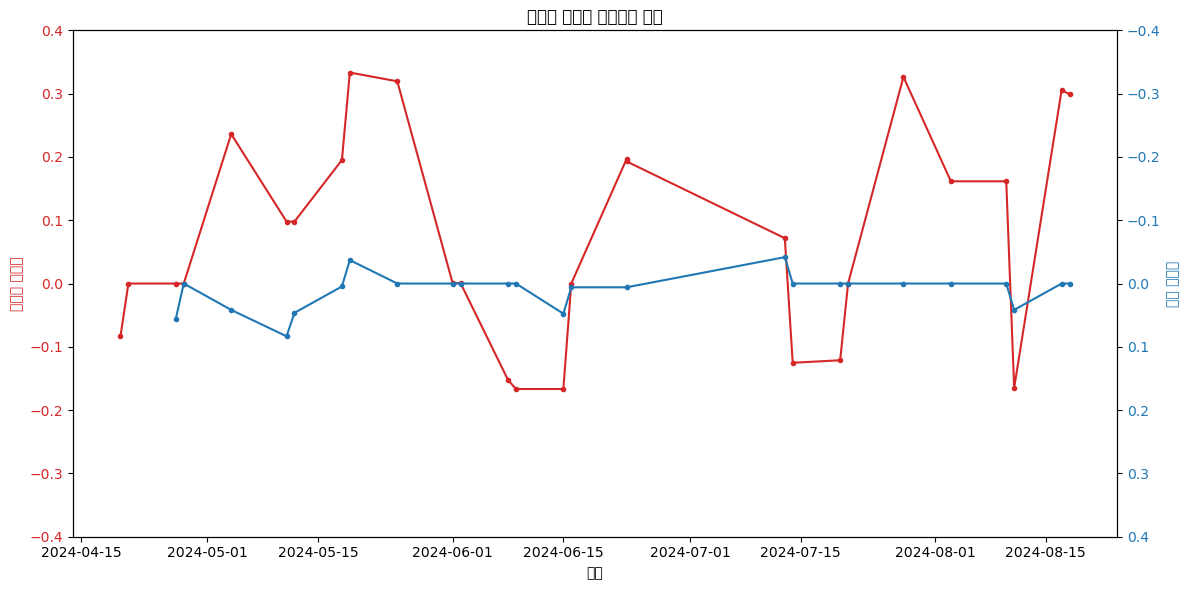

In [31]:
# datetime으로
filtered_hdata.index = pd.to_datetime(filtered_hdata.index, errors='coerce')
hdcc_week.index = pd.to_datetime(hdcc_week.index, errors='coerce')


# 결측치 제거
filtered_hdata = filtered_hdata.dropna(subset=['롤링 변화율'])
hdcc_week = hdcc_week.dropna(subset=['관중수 변화율'])

fig, ax1 = plt.subplots(figsize=(12, 6))

# 관중수 변화율
color = 'tab:red'
ax1.set_xlabel('날짜')
ax1.set_ylabel('관중수 변화율', color=color)
ax1.plot(hdcc_week.index, hdcc_week['관중수 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdcc_week')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0.4, 0.4)

# 순위 변화율 
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('순위 변화율', color=color)
ax2.plot(filtered_hdata.index, filtered_hdata['롤링 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdata 순위 변화율')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0.4, 0.4)
ax2.invert_yaxis()  #  Y축 뒤집음

plt.title('순위와 관중수 변화율의 비교')
fig.tight_layout()  

plt.show()

평일 롤링

In [32]:
hdcc_work.set_index('날짜', inplace=True)

In [33]:
hdcc_work = hdcc_work.copy()

# 변화율 계산
hdcc_work['변화율'] = hdcc_work['관중수'].pct_change()

In [52]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
hdcc_work['관중수 변화율'] = hdcc_work['변화율'].rolling(window=5).mean()

In [44]:
print(hdata.index)
print(hdcc_work.index)


DatetimeIndex(['2024-03-23', '2024-03-24', '2024-03-26', '2024-03-27',
               '2024-03-28', '2024-03-29', '2024-03-30', '2024-03-31',
               '2024-04-02', '2024-04-03',
               ...
               '2024-08-08', '2024-08-09', '2024-08-10', '2024-08-11',
               '2024-08-13', '2024-08-14', '2024-08-15', '2024-08-16',
               '2024-08-17', '2024-08-18'],
              dtype='datetime64[ns]', name='일자', length=124, freq=None)
Index(['2024/03/26', '2024/03/27', '2024/03/28', '2024/03/29', '2024/04/02',
       '2024/04/04', '2024/04/05', '2024/04/09', '2024/04/10', '2024/04/11',
       '2024/04/12', '2024/04/16', '2024/04/17', '2024/04/19', '2024/04/23',
       '2024/04/24', '2024/04/25', '2024/04/26', '2024/04/30', '2024/05/01',
       '2024/05/02', '2024/05/03', '2024/05/08', '2024/05/09', '2024/05/10',
       '2024/05/14', '2024/05/15', '2024/05/16', '2024/05/17', '2024/05/21',
       '2024/05/22', '2024/05/23', '2024/05/24', '2024/05/28', '2024/05/29',

In [45]:
hdcc_work.index = pd.to_datetime(hdcc_work.index)

In [46]:
# hdcc_work = hdata
filtered_hdata_work = hdata.loc[hdata.index.intersection(hdcc_work.index)]

print(filtered_hdata_work)

            순위  팀명   경기   승   패  무     승률   게임차  최근10경기  연속        홈       방문  \
2024-03-26   2  한화    3   2   1  0  0.667   0.5  2승0무1패  2승    0-0-0    2-0-1   
2024-03-27   2  한화    4   3   1  0  0.750   0.5  3승0무1패  3승    0-0-0    3-0-1   
2024-03-28   2  한화    5   4   1  0  0.800   0.0  4승0무1패  4승    0-0-0    4-0-1   
2024-03-29   2  한화    6   5   1  0  0.833   0.0  5승0무1패  5승    1-0-0    4-0-1   
2024-04-02   1  한화    9   7   2  0  0.778   0.0  7승0무2패  1패    3-0-1    4-0-1   
...         ..  ..  ...  ..  .. ..    ...   ...     ...  ..      ...      ...   
2024-08-09   8  한화  105  48  55  2  0.466  13.0  8승0무2패  2승  25-2-28  23-0-27   
2024-08-13   9  한화  108  48  58  2  0.453  14.5  5승0무5패  3패  25-2-31  23-0-27   
2024-08-14   9  한화  109  49  58  2  0.458  13.5  5승0무5패  1승  26-2-31  23-0-27   
2024-08-15   9  한화  110  49  59  2  0.454  14.5  4승0무6패  1패  26-2-32  23-0-27   
2024-08-16   8  한화  111  50  59  2  0.459  14.5  5승0무5패  1승  26-2-32  24-0-27   

                 변화율  
2024

In [53]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
filtered_hdata_work['롤링 변화율'] = filtered_hdata_work['변화율'].rolling(window=5).mean()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21060\3506270089.py:28: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 레이아웃 조정
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21060\3506270089.py:28: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 레이아웃 조정
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21060\3506270089.py:28: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 레이아웃 조정
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21060\3506270089.py:28: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 레이아웃 조정
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21060\3506270089.py:28: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 레이아웃 조정
C:\Users\Publi

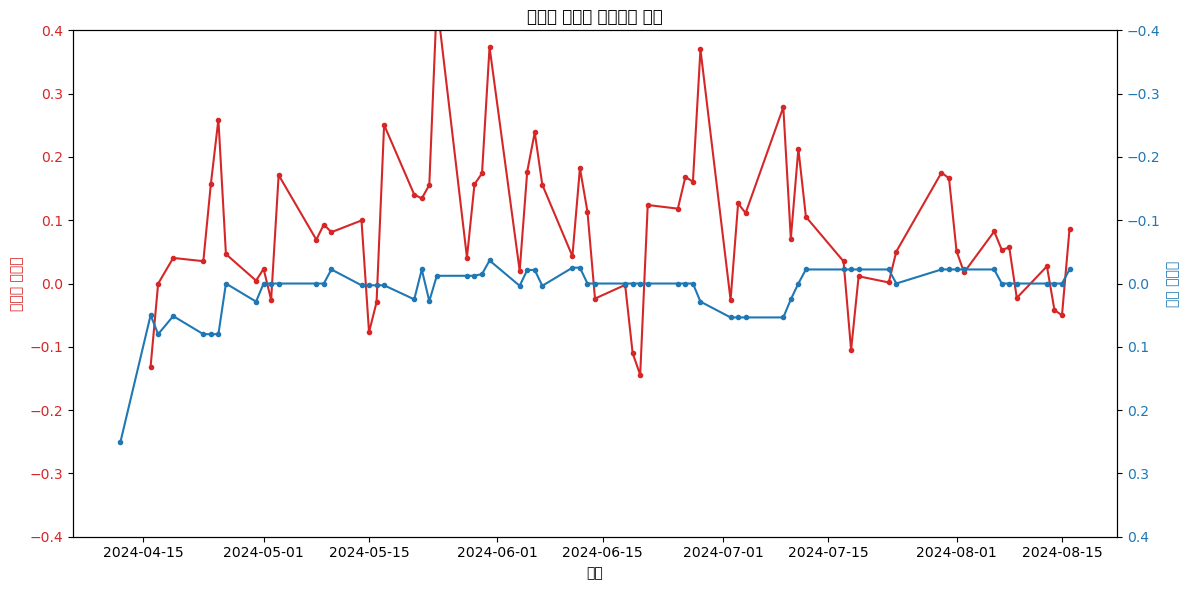

In [54]:
# 결측치 제거
filtered_hdata_work = filtered_hdata_work.dropna(subset=['롤링 변화율'])
hdcc_work = hdcc_work.dropna(subset=['관중수 변화율'])

fig, ax1 = plt.subplots(figsize=(12, 6))

# 관중수 변화율
color = 'tab:red'
ax1.set_xlabel('날짜')
ax1.set_ylabel('관중수 변화율', color=color)
ax1.plot(hdcc_work.index, hdcc_work['관중수 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdcc_week')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0.4, 0.4)

# 순위 변화율
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('순위 변화율', color=color)
ax2.plot(filtered_hdata_work.index, filtered_hdata_work['롤링 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdata 순위 변화율')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0.4, 0.4)
ax2.invert_yaxis()  # Y축 뒤집음

plt.title('순위와 관중수 변화율의 비교')
fig.tight_layout()

plt.show()

In [14]:
hdc_slicing = hdc.iloc[:113].copy()

In [15]:
hdc_slicing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 0 to 570
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      113 non-null    object 
 1   요일      113 non-null    object 
 2   홈       113 non-null    object 
 3   방문      113 non-null    object 
 4   구장      113 non-null    object 
 5   관중수     113 non-null    float64
dtypes: float64(1), object(5)
memory usage: 6.2+ KB


In [16]:
total_crowd_2023 = hdc_slicing['관중수'].sum()
print(total_crowd_2023)

1154632.0


In [17]:
hdcc_slicing = hdcc.iloc[:113].copy()

In [18]:
total_crowd_2024 = hdcc_slicing['관중수'].sum()
print(total_crowd_2024)

1616596.0


In [19]:
avg_total_2023 = total_crowd_2023 / 113

In [20]:
avg_total_2024 = total_crowd_2024 / 113

In [21]:
print(f"2023년 한화 113게임 평균 관중수는{avg_total_2023}")
print(f"2024년 한화 113게임 평균 관중수는{avg_total_2024}")

2023년 한화 113게임 평균 관중수는10217.982300884956
2024년 한화 113게임 평균 관중수는14306.159292035398


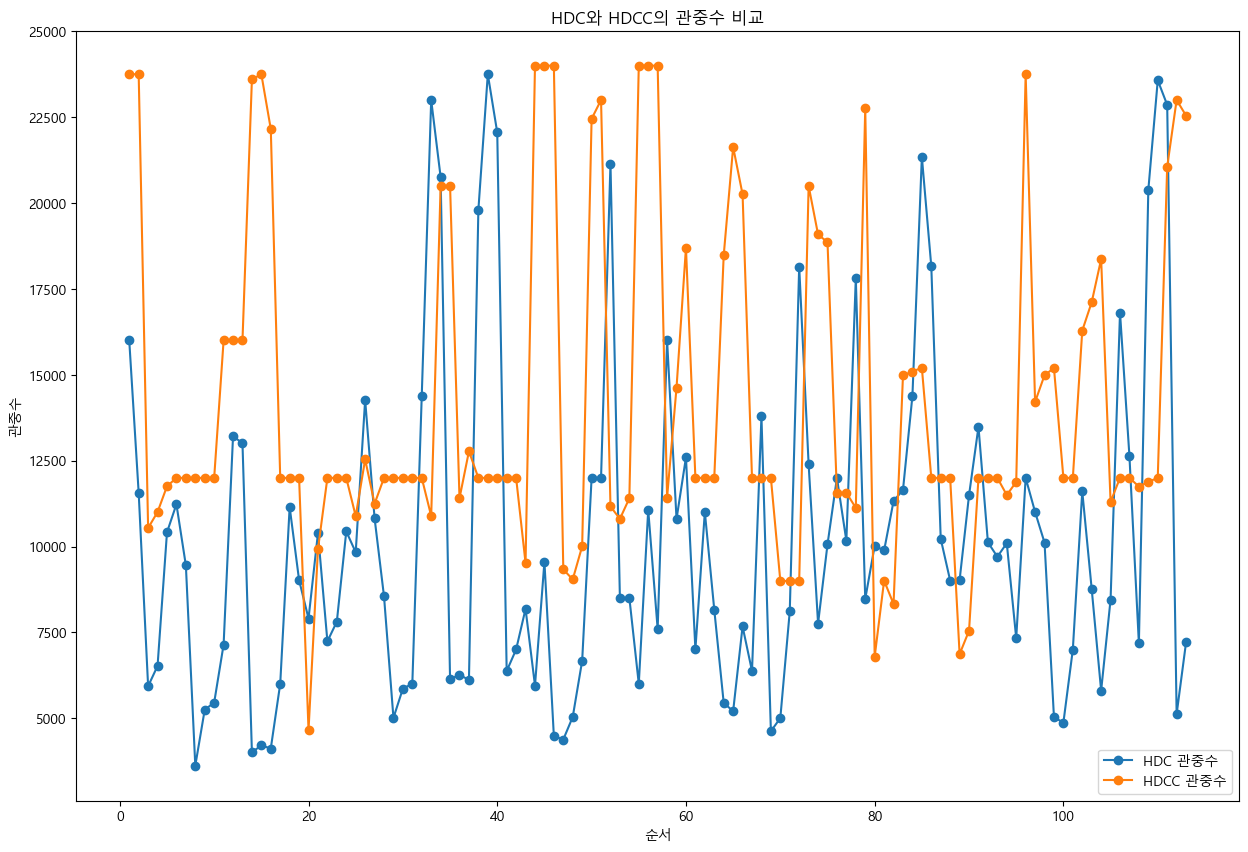

In [22]:
x_values_hdc = range(1, len(hdc_slicing) + 1)
x_values_hdcc = range(1, len(hdcc_slicing) + 1)

plt.figure(figsize=(15, 10))

plt.plot(x_values_hdc, hdc_slicing['관중수'], label='HDC 관중수', marker='o')

plt.plot(x_values_hdcc, hdcc_slicing['관중수'], label='HDCC 관중수', marker='o')

plt.title('HDC와 HDCC의 관중수 비교')
plt.xlabel('순서')
plt.ylabel('관중수')
plt.legend()

plt.show()

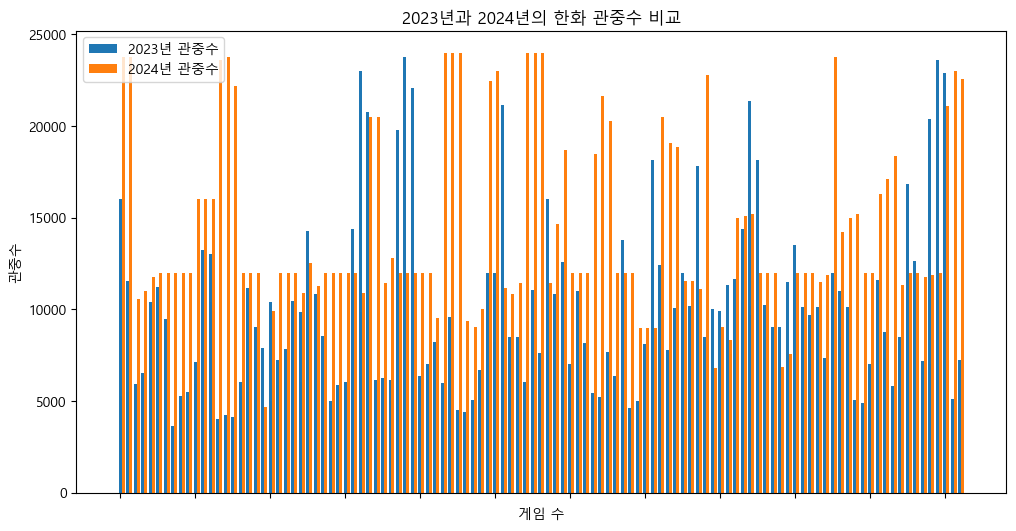

In [23]:
x_values = np.arange(len(hdc_slicing))

plt.figure(figsize=(12, 6))

bar_width = 0.4

plt.bar(x_values, hdc_slicing['관중수'], width=bar_width, label='2023년 관중수', align='center')

plt.bar(x_values + bar_width, hdcc_slicing['관중수'], width=bar_width, label='2024년 관중수', align='center')

plt.title('2023년과 2024년의 한화 관중수 비교')
plt.xlabel('게임 수')
plt.ylabel('관중수')

plt.xticks(x_values + bar_width / 2, x_values + 1)
plt.xticks(np.arange(0,113, step=10))
plt.legend()

# 그래프 표시
plt.show()

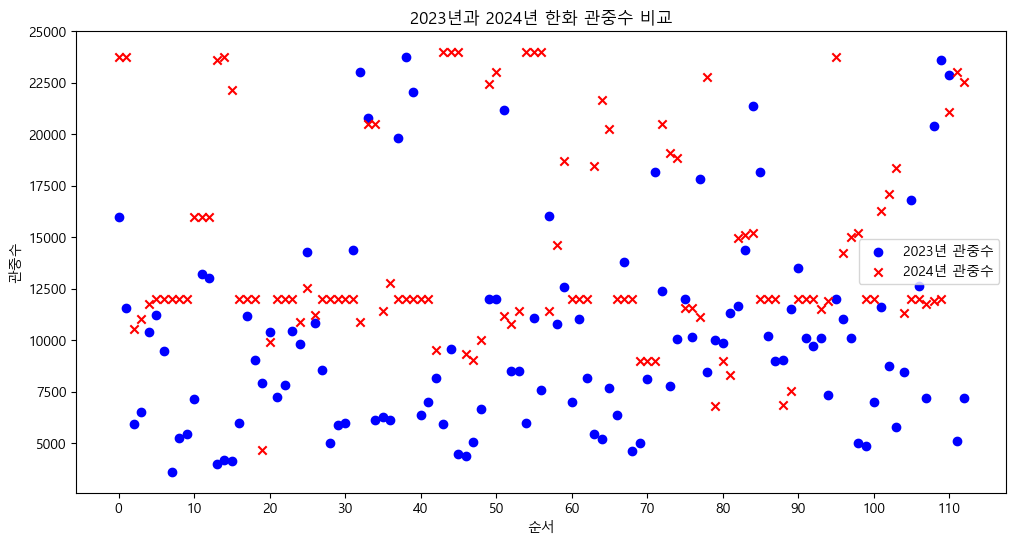

In [24]:
# 산점도
min_length = min(len(hdc_slicing), len(hdcc_slicing))

x_values = np.arange(min_length)

plt.figure(figsize=(12, 6))

plt.scatter(x_values, hdc_slicing['관중수'], color='blue', label='2023년 관중수', marker='o')

plt.scatter(x_values, hdcc_slicing['관중수'], color='red', label='2024년 관중수', marker='x')

plt.title('2023년과 2024년 한화 관중수 비교')
plt.xlabel('순서')
plt.ylabel('관중수')

plt.xticks(np.arange(0, min_length, step=10))
plt.legend()

plt.show()

In [25]:
ddc = pd.read_csv("daily_crowd_data_2022.csv")
ddc.head()

,날짜,요일,홈,방문,구장,관중수
0,2022/04/02,토,두산,한화,잠실,"16,271"
1,2022/04/02,토,KIA,LG,광주,"16,908"
2,2022/04/02,토,키움,롯데,고척,"8,257"
3,2022/04/02,토,NC,SSG,창원,"7,814"
4,2022/04/02,토,KT,삼성,수원,"17,057"


In [26]:
ddc['관중수'] = ddc['관중수'].apply(lambda x: str(x).replace(',', ''))

In [27]:
# (float 변환
ddc['관중수'] = ddc['관중수'].astype(float)

print(ddc)

             날짜 요일    홈   방문  구장      관중수
0    2022/04/02  토   두산   한화  잠실  16271.0
1    2022/04/02  토  KIA   LG  광주  16908.0
2    2022/04/02  토   키움   롯데  고척   8257.0
3    2022/04/02  토   NC  SSG  창원   7814.0
4    2022/04/02  토   KT   삼성  수원  17057.0
..          ... ..  ...  ...  ..      ...
715  2022/10/08  토   롯데   LG  사직  22990.0
716  2022/10/08  토   삼성  SSG  대구  24000.0
717  2022/10/08  토   두산   키움  잠실  23511.0
718  2022/10/10  월   KT   NC  수원  10535.0
719  2022/10/11  화   LG   KT  잠실  10092.0

[720 rows x 6 columns]


In [28]:
# 한화 행들만
hddc = ddc[(ddc['홈'] == '한화') | (ddc['방문'] == '한화')]

print(hddc)

             날짜 요일    홈   방문  구장      관중수
0    2022/04/02  토   두산   한화  잠실  16271.0
5    2022/04/03  일   두산   한화  잠실  11345.0
10   2022/04/05  화  KIA   한화  광주   2840.0
15   2022/04/06  수  KIA   한화  광주   3117.0
20   2022/04/07  목  KIA   한화  광주   2773.0
..          ... ..  ...  ...  ..      ...
688  2022/09/30  금   한화   롯데  대전   4025.0
695  2022/10/02  일   한화  KIA  대전  11336.0
699  2022/10/03  월   한화  SSG  대전   7023.0
709  2022/10/06  목   한화   키움  대전   9802.0
713  2022/10/08  토   NC   한화  창원  12462.0

[144 rows x 6 columns]


In [29]:
hddc_slicing = hddc.iloc[:113].copy()

In [30]:
hddc_slicing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 0 to 562
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      113 non-null    object 
 1   요일      113 non-null    object 
 2   홈       113 non-null    object 
 3   방문      113 non-null    object 
 4   구장      113 non-null    object 
 5   관중수     113 non-null    float64
dtypes: float64(1), object(5)
memory usage: 6.2+ KB


In [31]:
total_crowd_2022 = hddc_slicing['관중수'].sum()
print(total_crowd_2022)

721867.0


In [32]:
#2023년과 2024년 한화 관중수 증가율
print(total_crowd_2024/total_crowd_2023)

1.4000963077413409


In [33]:
#2022년과 2023년 한화 관중수 증가율
print(total_crowd_2023/total_crowd_2022)

1.5995079425988443


In [34]:
ddc_slicing = ddc.iloc[:526].copy()

In [35]:
total_crowd_2022_all = ddc_slicing['관중수'].sum()
print(total_crowd_2022_all)

4279900.0


### 롤링 윈도우 사용하기

In [36]:
hdcc_slicing.set_index('날짜', inplace=True)

In [37]:
hdcc_slicing['변화율'] = hdcc_slicing['관중수'].pct_change()

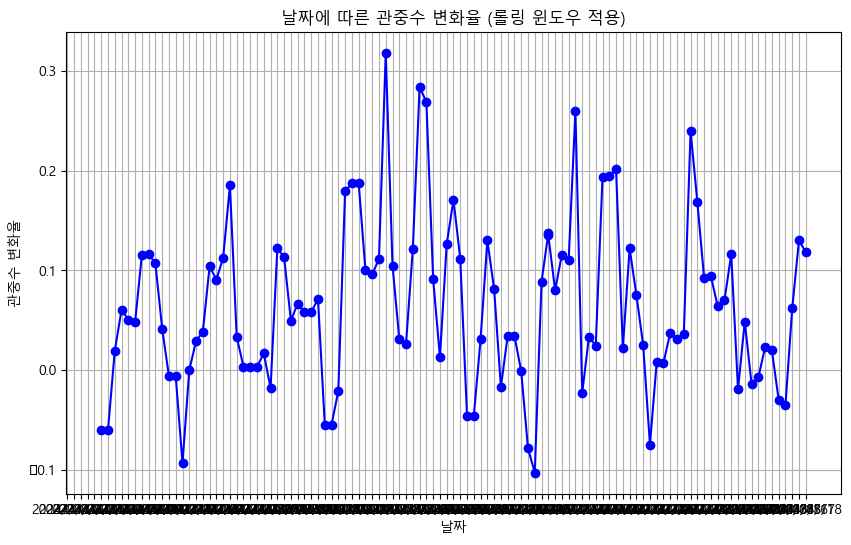

In [41]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
hdcc_slicing['롤링 변화율'] = hdcc_slicing['변화율'].rolling(window=7).mean()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(hdcc_slicing.index, hdcc_slicing['롤링 변화율'], marker='o', linestyle='-', color='b')
plt.title('날짜에 따른 관중수 변화율 (롤링 윈도우 적용)')
plt.xlabel('날짜')
plt.ylabel('관중수 변화율')
plt.grid(True)
plt.show()
# 경고문 = 맑은 고딕에 '-'가 없어서 생긴 오류

In [36]:
import os

In [37]:
# 다른 폴더의 csv 파일 이용 (주피터노트북을 이용할하여 작업할 경우)

# 현재 작업 디렉토리 확인
script_dir = os.getcwd()  # 현재 작업 디렉토리
file_path = os.path.join(script_dir,'..','Youngyun','2024_일자별순위.csv')
file_path = os.path.abspath(file_path)

# CSV 파일을 읽기

data = pd.read_csv(file_path)

# data.info()
data.head()

,일자,순위,팀명,경기,승,패,무,승률,게임차,최근10경기,연속,홈,방문
0,2024.03.23,1,LG,1,1,0,0,1.0,0.0,1승0무0패,1승,1-0-0,0-0-0
1,2024.03.23,1,SSG,1,1,0,0,1.0,0.0,1승0무0패,1승,1-0-0,0-0-0
2,2024.03.23,1,NC,1,1,0,0,1.0,0.0,1승0무0패,1승,1-0-0,0-0-0
3,2024.03.23,1,KIA,1,1,0,0,1.0,0.0,1승0무0패,1승,1-0-0,0-0-0
4,2024.03.23,1,삼성,1,1,0,0,1.0,0.0,1승0무0패,1승,0-0-0,1-0-0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      1240 non-null   object 
 1   순위      1240 non-null   int64  
 2   팀명      1240 non-null   object 
 3   경기      1240 non-null   int64  
 4   승       1240 non-null   int64  
 5   패       1240 non-null   int64  
 6   무       1240 non-null   int64  
 7   승률      1240 non-null   float64
 8   게임차     1240 non-null   float64
 9   최근10경기  1240 non-null   object 
 10  연속      1240 non-null   object 
 11  홈       1240 non-null   object 
 12  방문      1240 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 126.1+ KB


In [39]:
# 날짜 형식 변환
data['일자'] = pd.to_datetime(data['일자'].str.replace('.', '/'), format='%Y/%m/%d')
print(data['일자'])
print(data['일자'].dtype)

0      2024-03-23
1      2024-03-23
2      2024-03-23
3      2024-03-23
4      2024-03-23
          ...    
1235   2024-08-18
1236   2024-08-18
1237   2024-08-18
1238   2024-08-18
1239   2024-08-18
Name: 일자, Length: 1240, dtype: datetime64[ns]
datetime64[ns]


In [40]:
# 한화행들만
hdata = data[data['팀명'] == '한화'].copy()
hdata_8 = hdata[(hdata['일자'] >= '2024-08-01') & (hdata['일자'] <= '2024-08-18')]

print(hdata_8)

             일자  순위  팀명   경기   승   패  무     승률   게임차  최근10경기  연속        홈  \
1087 2024-08-01   8  한화   99  44  53  2  0.454  14.0  6승0무4패  6승  23-2-27   
1097 2024-08-02   8  한화  100  45  53  2  0.459  13.0  7승0무3패  7승  24-2-27   
1107 2024-08-03   8  한화  101  45  54  2  0.455  14.0  7승0무3패  1패  24-2-28   
1117 2024-08-04   8  한화  101  45  54  2  0.455  14.0  7승0무3패  1패  24-2-28   
1127 2024-08-06   8  한화  102  46  54  2  0.460  14.0  8승0무2패  1승  24-2-28   
1137 2024-08-07   8  한화  103  46  55  2  0.455  14.0  8승0무2패  1패  24-2-28   
1147 2024-08-08   8  한화  104  47  55  2  0.461  13.0  8승0무2패  1승  24-2-28   
1157 2024-08-09   8  한화  105  48  55  2  0.466  13.0  8승0무2패  2승  25-2-28   
1167 2024-08-10   8  한화  106  48  56  2  0.462  13.5  7승0무3패  1패  25-2-29   
1178 2024-08-11   9  한화  107  48  57  2  0.457  13.5  6승0무4패  2패  25-2-30   
1188 2024-08-13   9  한화  108  48  58  2  0.453  14.5  5승0무5패  3패  25-2-31   
1198 2024-08-14   9  한화  109  49  58  2  0.458  13.5  5승0무5패  1승  26-2-31   

In [41]:
hdata['변화율'] = hdata['순위'].pct_change()

In [42]:
hdata.set_index('일자', inplace=True)

c:\Users\medici\miniconda3\envs\baseball_project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


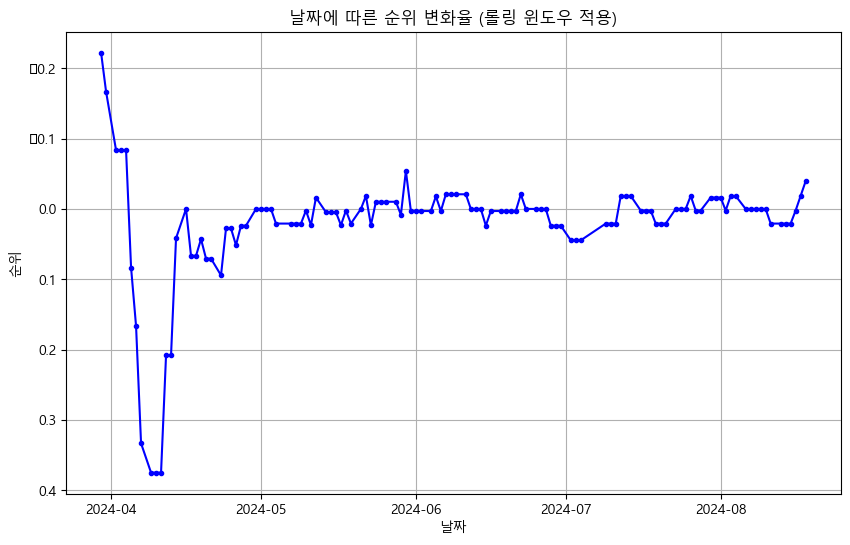

In [81]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
hdata['롤링 변화율'] = hdata['변화율'].rolling(window=6).mean()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(hdata.index, hdata['롤링 변화율'], marker='o', linestyle='-', color='b', markersize=3)
plt.title('날짜에 따른 순위 변화율 (롤링 윈도우 적용)')
plt.xlabel('날짜')
plt.ylabel('순위')
plt.grid(True)
plt.gca().invert_yaxis()

plt.show()
# 경고문 = 맑은 고딕에 '-'가 없어서 생긴 오류

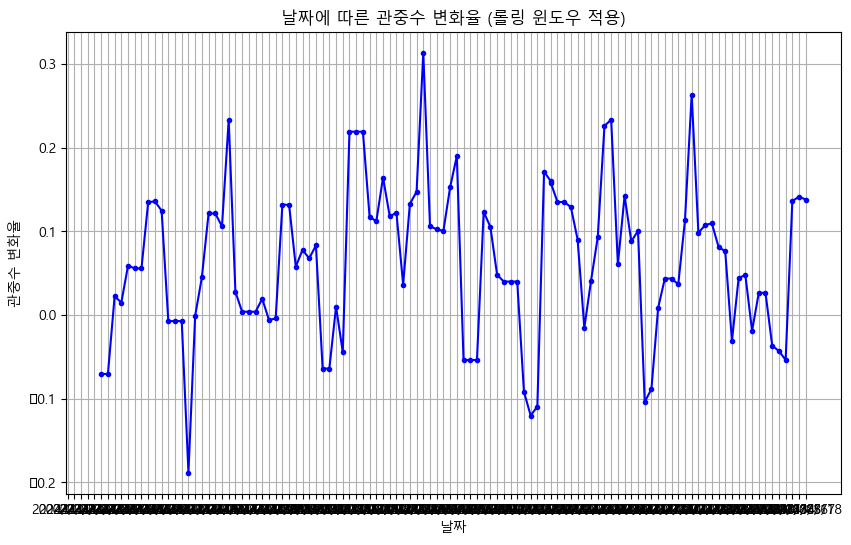

In [52]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
hdcc_slicing['롤링 변화율'] = hdcc_slicing['변화율'].rolling(window=6).mean()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(hdcc_slicing.index, hdcc_slicing['롤링 변화율'], marker='o', linestyle='-', color='b', markersize=3)
plt.title('날짜에 따른 관중수 변화율 (롤링 윈도우 적용)')
plt.xlabel('날짜')
plt.ylabel('관중수 변화율')
plt.grid(True)
plt.show()
# 경고문 = 맑은 고딕에 '-'가 없어서 생긴 오류

c:\Users\medici\miniconda3\envs\baseball_project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


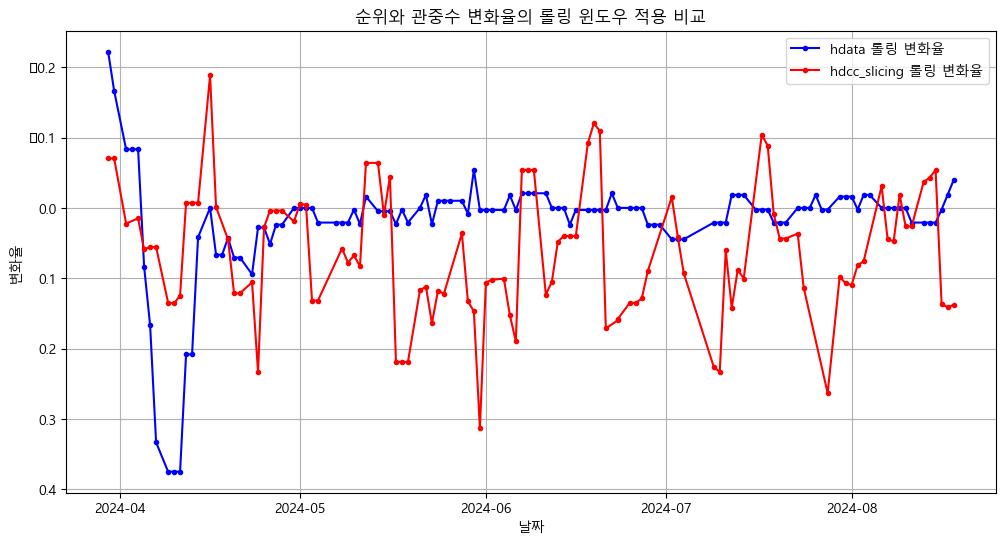

In [83]:
hdata.index = pd.to_datetime(hdata.index, errors='coerce')
hdcc_slicing.index = pd.to_datetime(hdcc_slicing.index, errors='coerce')

# 결측치 제거
hdata = hdata.dropna(subset=['롤링 변화율'])
hdcc_slicing = hdcc_slicing.dropna(subset=['롤링 변화율'])

plt.figure(figsize=(12, 6))

# 순위 데이터
plt.plot(hdata.index, hdata['롤링 변화율'], marker='o', linestyle='-', color='b', markersize=3, label='hdata 롤링 변화율')

# 관중수 데이터
plt.plot(hdcc_slicing.index, hdcc_slicing['롤링 변화율'], marker='o', linestyle='-', color='r', markersize=3, label='hdcc_slicing 롤링 변화율')

plt.title('순위와 관중수 변화율의 롤링 윈도우 적용 비교')
plt.xlabel('날짜')
plt.ylabel('변화율')
plt.gca().invert_yaxis()

plt.legend()
plt.grid(True)
plt.show()


C:\Users\medici\AppData\Local\Temp\ipykernel_12548\3105731953.py:32: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.tight_layout()  # 레이아웃 조정
c:\Users\medici\miniconda3\envs\baseball_project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


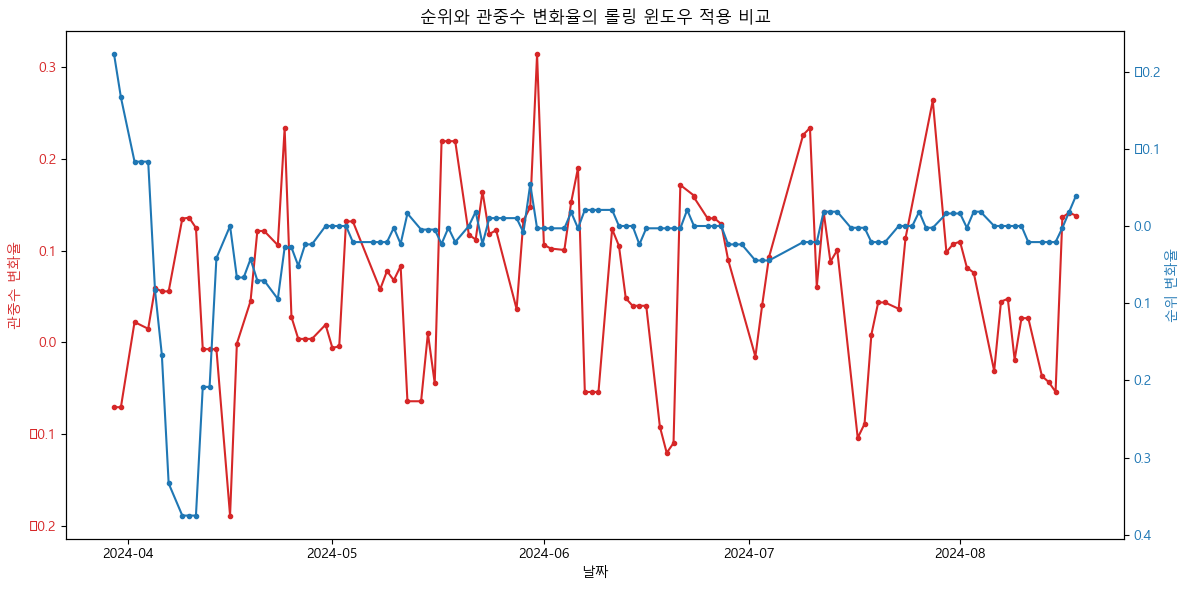

In [84]:
hdata.index = pd.to_datetime(hdata.index, errors='coerce')
hdcc_slicing.index = pd.to_datetime(hdcc_slicing.index, errors='coerce')

# 결측치 제거
hdata = hdata.dropna(subset=['롤링 변화율'])
hdcc_slicing = hdcc_slicing.dropna(subset=['롤링 변화율'])

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('날짜')
ax1.set_ylabel('관중수 변화율', color=color)
ax1.plot(hdcc_slicing.index, hdcc_slicing['롤링 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdcc_slicing 관중수 변화율')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-0.4, 0.4)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('순위 변화율', color=color)
ax2.plot(hdata.index, hdata['롤링 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdata 순위 변화율')
ax2.tick_params(axis='y', labelcolor=color)
ax2.invert_yaxis()
ax2.set_ylim(-0.4, 0.4)

plt.title('순위와 관중수 변화율의 롤링 윈도우 적용 비교')
fig.tight_layout()

plt.show()


C:\Users\medici\AppData\Local\Temp\ipykernel_12548\1283526545.py:34: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.tight_layout()  # 레이아웃 조정
c:\Users\medici\miniconda3\envs\baseball_project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


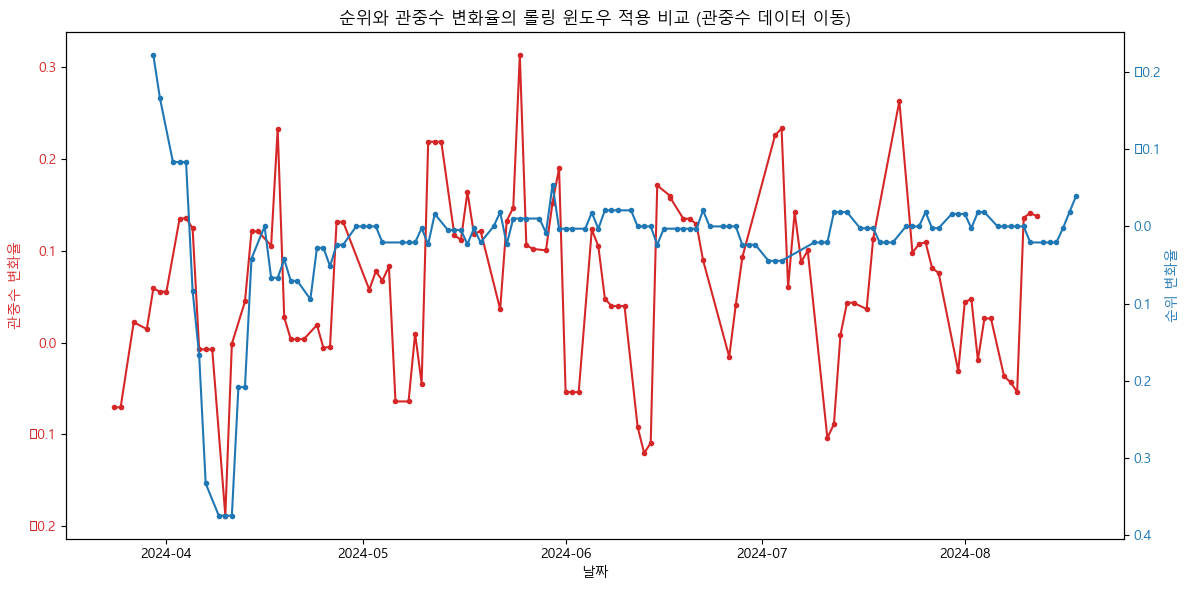

In [85]:
hdata.index = pd.to_datetime(hdata.index, errors='coerce')
hdcc_slicing.index = pd.to_datetime(hdcc_slicing.index, errors='coerce')

# 인덱스 시프트 (관중수 데이터를 왼쪽으로 6일 이동)
shift_periods = 6
hdcc_slicing_shifted = hdcc_slicing.copy()
hdcc_slicing_shifted.index = hdcc_slicing.index - pd.DateOffset(days=shift_periods)

# 결측치 제거
hdata = hdata.dropna(subset=['롤링 변화율'])
hdcc_slicing_shifted = hdcc_slicing_shifted.dropna(subset=['롤링 변화율'])

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('날짜')
ax1.set_ylabel('관중수 변화율', color=color)
ax1.plot(hdcc_slicing_shifted.index, hdcc_slicing_shifted['롤링 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdcc_slicing 관중수 변화율')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('순위 변화율', color=color)
ax2.plot(hdata.index, hdata['롤링 변화율'], marker='o', linestyle='-', color=color, markersize=3, label='hdata 순위 변화율')
ax2.tick_params(axis='y', labelcolor=color)
ax2.invert_yaxis()  

plt.title('순위와 관중수 변화율의 롤링 윈도우 적용 비교 (관중수 데이터 이동)')
fig.tight_layout()

plt.show()


In [ ]:
# 2023년 데이터
hdc_slicing.set_index('날짜', inplace=True)

In [44]:
hdc_slicing['변화율'] = hdc_slicing['관중수'].pct_change()

c:\Users\medici\miniconda3\envs\baseball_project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


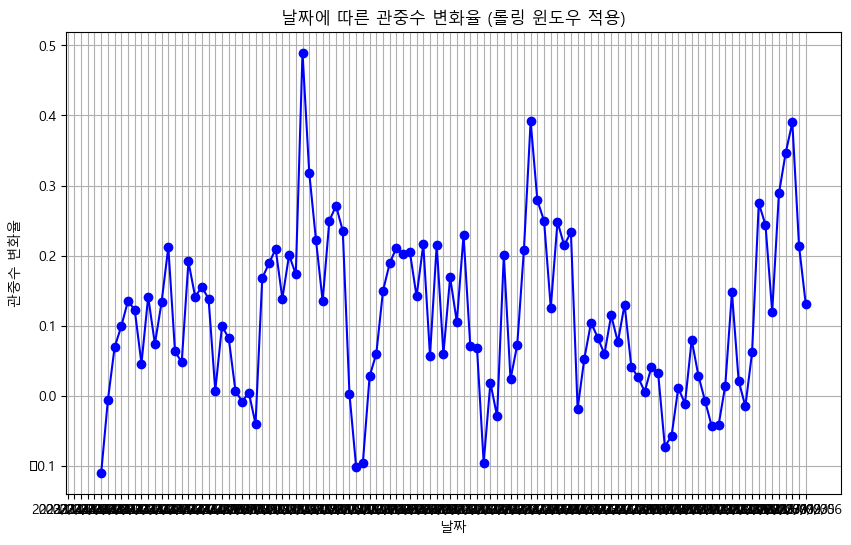

In [45]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
hdc_slicing['롤링 변화율'] = hdc_slicing['변화율'].rolling(window=7).mean()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(hdc_slicing.index, hdc_slicing['롤링 변화율'], marker='o', linestyle='-', color='b')
plt.title('날짜에 따른 관중수 변화율 (롤링 윈도우 적용)')
plt.xlabel('날짜')
plt.ylabel('관중수 변화율')
plt.grid(True)
plt.show()


In [86]:
hdata.index = pd.to_datetime(hdata.index, errors='coerce')
hdcc_slicing.index = pd.to_datetime(hdcc_slicing.index, errors='coerce')

hdata = hdata.sort_index()
hdcc_slicing = hdcc_slicing.sort_index()

# 인덱스 조정 (관중수 데이터 이동)
shift_periods = 6
hdcc_slicing_shifted = hdcc_slicing.copy()
hdcc_slicing_shifted.index = hdcc_slicing.index - pd.DateOffset(days=shift_periods)

# 결측치 제거
hdata = hdata.dropna(subset=['롤링 변화율'])
hdcc_slicing_shifted = hdcc_slicing_shifted.dropna(subset=['롤링 변화율'])

# 상관계수 계산
correlation = hdata['롤링 변화율'].corr(hdcc_slicing_shifted['롤링 변화율'])
print(f'상관계수: {correlation:.2f}')

# 시차 상관관계 분석
def calculate_lagged_correlation(data1, data2, max_lag=10):
    correlations = []
    for lag in range(max_lag + 1):
        shifted_data1 = data1.shift(lag)
        correlation = shifted_data1.corr(data2)
        correlations.append(correlation)
    return correlations

# 최대 시차 10일로 설정
max_lag = 10
lagged_correlations = calculate_lagged_correlation(hdata['롤링 변화율'], hdcc_slicing_shifted['롤링 변화율'], max_lag)

# 시차 상관관계 출력
for lag, corr in enumerate(lagged_correlations):
    print(f'{lag}일 시차 상관계수: {corr:.2f}')

상관계수: -0.22
0일 시차 상관계수: -0.22
1일 시차 상관계수: -0.24
2일 시차 상관계수: -0.19
3일 시차 상관계수: -0.08
4일 시차 상관계수: 0.03
5일 시차 상관계수: 0.14
6일 시차 상관계수: 0.21
7일 시차 상관계수: 0.16
8일 시차 상관계수: 0.12
9일 시차 상관계수: 0.06
10일 시차 상관계수: -0.09


In [89]:
# 날짜 인덱스를 datetime 형식으로 변환
hdata.index = pd.to_datetime(hdata.index, errors='coerce')
hdcc_slicing.index = pd.to_datetime(hdcc_slicing.index, errors='coerce')

# 결측치가 있는지 확인하고 제거
hdata = hdata.dropna(subset=['변화율'])
hdcc_slicing = hdcc_slicing.dropna(subset=['변화율'])

# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
hdata['롤링 변화율'] = hdata['변화율'].rolling(window=6).mean()
hdcc_slicing['롤링 변화율'] = hdcc_slicing['변화율'].rolling(window=6).mean()

# 결측치가 있는지 확인하고 제거
hdata = hdata.dropna(subset=['롤링 변화율'])
hdcc_slicing = hdcc_slicing.dropna(subset=['롤링 변화율'])

# 시차 조정
shift_periods = 6
hdcc_slicing_shifted = hdcc_slicing.copy()
hdcc_slicing_shifted.index = hdcc_slicing.index - pd.DateOffset(days=shift_periods)

# 상관계수 계산
correlation = hdata['롤링 변화율'].corr(hdcc_slicing_shifted['롤링 변화율'])
print(f'상관계수: {correlation:.2f}')

# 시차 상관관계 분석
def calculate_lagged_correlation(data1, data2, max_lag=10):
    correlations = []
    for lag in range(max_lag + 1):
        shifted_data1 = data1.shift(lag)
        correlation = shifted_data1.corr(data2)
        correlations.append(correlation)
    return correlations

# 최대 시차 10일로 설정
max_lag = 10
lagged_correlations = calculate_lagged_correlation(hdata['롤링 변화율'], hdcc_slicing_shifted['롤링 변화율'], max_lag)

# 시차 상관관계 출력
for lag, corr in enumerate(lagged_correlations):
    print(f'{lag}일 시차 상관계수: {corr:.2f}')


상관계수: -0.23
0일 시차 상관계수: -0.23
1일 시차 상관계수: -0.23
2일 시차 상관계수: -0.17
3일 시차 상관계수: -0.05
4일 시차 상관계수: 0.07
5일 시차 상관계수: 0.10
6일 시차 상관계수: 0.12
7일 시차 상관계수: 0.08
8일 시차 상관계수: 0.03
9일 시차 상관계수: -0.05
10일 시차 상관계수: -0.12


In [90]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 2024-04-05 to 2024-08-18
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      113 non-null    int64  
 1   팀명      113 non-null    object 
 2   경기      113 non-null    int64  
 3   승       113 non-null    int64  
 4   패       113 non-null    int64  
 5   무       113 non-null    int64  
 6   승률      113 non-null    float64
 7   게임차     113 non-null    float64
 8   최근10경기  113 non-null    object 
 9   연속      113 non-null    object 
 10  홈       113 non-null    object 
 11  방문      113 non-null    object 
 12  변화율     113 non-null    float64
 13  롤링 변화율  113 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 13.2+ KB


In [98]:
# hdata 복사
hdata_reverse = hdata.copy()

# 1~10의 숫자를 역순으로 변환
hdata_reverse['순위'] = hdata_reverse['순위'].apply(lambda x: 11 - x)

print(hdata_reverse)

            순위  팀명   경기   승   패  무     승률   게임차  최근10경기  연속        홈       방문  \
일자                                                                              
2024-03-23   5  한화    1   0   1  0  0.000   1.0  0승0무1패  1패    0-0-0    0-0-1   
2024-03-24   7  한화    2   1   1  0  0.500   1.0  1승0무1패  1승    0-0-0    1-0-1   
2024-03-26   9  한화    3   2   1  0  0.667   0.5  2승0무1패  2승    0-0-0    2-0-1   
2024-03-27   9  한화    4   3   1  0  0.750   0.5  3승0무1패  3승    0-0-0    3-0-1   
2024-03-28   9  한화    5   4   1  0  0.800   0.0  4승0무1패  4승    0-0-0    4-0-1   
...         ..  ..  ...  ..  .. ..    ...   ...     ...  ..      ...      ...   
2024-08-14   2  한화  109  49  58  2  0.458  13.5  5승0무5패  1승  26-2-31  23-0-27   
2024-08-15   2  한화  110  49  59  2  0.454  14.5  4승0무6패  1패  26-2-32  23-0-27   
2024-08-16   3  한화  111  50  59  2  0.459  14.5  5승0무5패  1승  26-2-32  24-0-27   
2024-08-17   4  한화  112  51  59  2  0.464  14.5  5승0무5패  2승  26-2-32  25-0-27   
2024-08-18   4  한화  113  52 

In [ ]:
# 날짜 인덱스를 datetime 형식으로 변환
hdata.index = pd.to_datetime(hdata.index, errors='coerce')
hdcc_slicing.index = pd.to_datetime(hdcc_slicing.index, errors='coerce')

# 데이터 정렬 (날짜 기준)
hdata = hdata.sort_index()
hdcc_slicing = hdcc_slicing.sort_index()

# 인덱스 조정 (관중수 데이터 이동)
shift_periods = 6
hdcc_slicing_shifted = hdcc_slicing.copy()
hdcc_slicing_shifted.index = hdcc_slicing.index - pd.DateOffset(days=shift_periods)

# 결측치 제거
hdata = hdata.dropna(subset=['롤링 변화율'])
hdcc_slicing_shifted = hdcc_slicing_shifted.dropna(subset=['롤링 변화율'])

# 상관계수 계산
correlation = hdata['롤링 변화율'].corr(hdcc_slicing_shifted['롤링 변화율'])
print(f'상관계수: {correlation:.2f}')

# 시차 상관관계 분석
def calculate_lagged_correlation(data1, data2, max_lag=10):
    correlations = []
    for lag in range(max_lag + 1):
        shifted_data1 = data1.shift(lag)
        correlation = shifted_data1.corr(data2)
        correlations.append(correlation)
    return correlations

# 최대 시차 10일로 설정
max_lag = 10
lagged_correlations = calculate_lagged_correlation(hdata['롤링 변화율'], hdcc_slicing_shifted['롤링 변화율'], max_lag)

# 시차 상관관계 출력
for lag, corr in enumerate(lagged_correlations):
    print(f'{lag}일 시차 상관계수: {corr:.2f}')

In [100]:
# 상관계수 계산 (원본 데이터)
correlation = hdata['순위'].corr(hdcc_slicing_shifted['관중수'])
print(f'상관계수: {correlation:.2f}')

# 시차 상관관계 분석 (원본 데이터)
def calculate_lagged_correlation(data1, data2, max_lag=10):
    correlations = []
    for lag in range(max_lag + 1):
        shifted_data1 = data1.shift(lag)
        correlation = shifted_data1.corr(data2)
        correlations.append(correlation)
    return correlations

# 최대 시차 10일로 설정
max_lag = 10
lagged_correlations = calculate_lagged_correlation(hdata['순위'], hdcc_slicing_shifted['관중수'], max_lag)

# 시차 상관관계 출력
for lag, corr in enumerate(lagged_correlations):
    print(f'{lag}일 시차 상관계수: {corr:.2f}')

상관계수: -0.13
0일 시차 상관계수: -0.13
1일 시차 상관계수: -0.14
2일 시차 상관계수: -0.07
3일 시차 상관계수: -0.01
4일 시차 상관계수: 0.01
5일 시차 상관계수: 0.01
6일 시차 상관계수: 0.04
7일 시차 상관계수: 0.03
8일 시차 상관계수: 0.05
9일 시차 상관계수: 0.13
10일 시차 상관계수: 0.20


In [101]:
# 상관계수 계산 (원본 데이터)
correlation = hdata_reverse['순위'].corr(hdcc_slicing_shifted['관중수'])
print(f'상관계수: {correlation:.2f}')

# 시차 상관관계 분석 (원본 데이터)
def calculate_lagged_correlation(data1, data2, max_lag=10):
    correlations = []
    for lag in range(max_lag + 1):
        shifted_data1 = data1.shift(lag)
        correlation = shifted_data1.corr(data2)
        correlations.append(correlation)
    return correlations

# 최대 시차 10일로 설정
max_lag = 10
lagged_correlations = calculate_lagged_correlation(hdata_reverse['순위'], hdcc_slicing_shifted['관중수'], max_lag)

# 시차 상관관계 출력
for lag, corr in enumerate(lagged_correlations):
    print(f'{lag}일 시차 상관계수: {corr:.2f}')

상관계수: 0.13
0일 시차 상관계수: 0.13
1일 시차 상관계수: 0.14
2일 시차 상관계수: 0.07
3일 시차 상관계수: 0.01
4일 시차 상관계수: -0.01
5일 시차 상관계수: -0.01
6일 시차 상관계수: -0.04
7일 시차 상관계수: -0.03
8일 시차 상관계수: -0.05
9일 시차 상관계수: -0.13
10일 시차 상관계수: -0.20


In [102]:
# 롤링 윈도우 적용 (예: 7일 롤링 윈도우)
hdata_reverse['롤링 변화율'] = hdata_reverse['변화율'].rolling(window=6).mean()

In [103]:
hdata_reverse.index = pd.to_datetime(hdata_reverse.index, errors='coerce')
hdcc_slicing.index = pd.to_datetime(hdcc_slicing.index, errors='coerce')

hdata_reverse = hdata_reverse.sort_index()
hdcc_slicing = hdcc_slicing.sort_index()

# 인덱스 조정 (관중수 데이터 이동)
shift_periods = 6
hdcc_slicing_shifted = hdcc_slicing.copy()
hdcc_slicing_shifted.index = hdcc_slicing.index - pd.DateOffset(days=shift_periods)

# 결측치 제거
hdata_reverse = hdata_reverse.dropna(subset=['롤링 변화율'])
hdcc_slicing_shifted = hdcc_slicing_shifted.dropna(subset=['롤링 변화율'])

# 상관계수 계산
correlation = hdata_reverse['롤링 변화율'].corr(hdcc_slicing_shifted['롤링 변화율'])
print(f'상관계수: {correlation:.2f}')

# 시차 상관관계 분석
def calculate_lagged_correlation(data1, data2, max_lag=10):
    correlations = []
    for lag in range(max_lag + 1):
        shifted_data1 = data1.shift(lag)
        correlation = shifted_data1.corr(data2)
        correlations.append(correlation)
    return correlations

# 최대 시차 10일로 설정
max_lag = 10
lagged_correlations = calculate_lagged_correlation(hdata_reverse['롤링 변화율'], hdcc_slicing_shifted['롤링 변화율'], max_lag)

# 시차 상관관계 출력
for lag, corr in enumerate(lagged_correlations):
    print(f'{lag}일 시차 상관계수: {corr:.2f}')

상관계수: -0.24
0일 시차 상관계수: -0.24
1일 시차 상관계수: -0.24
2일 시차 상관계수: -0.19
3일 시차 상관계수: -0.08
4일 시차 상관계수: 0.03
5일 시차 상관계수: 0.14
6일 시차 상관계수: 0.21
7일 시차 상관계수: 0.16
8일 시차 상관계수: 0.12
9일 시차 상관계수: 0.06
10일 시차 상관계수: -0.09


In [104]:
ryu = pd.read_csv("류현진출전일점유율.csv")
ryu.head() 

,날짜,요일,홈,방문,구장_x,관중수,좌석수,점유율,상대,구분,...,TBF,IP,H,HR,BB,HBP,SO,R,ER,ERA2
0,2024/03/23,토,LG,한화,잠실,23750.0,23750,1.000000,LG,선발,...,21.0,3 2/3,6.0,0.0,3.0,0.0,0.0,5.0,2.0,4.91
1,2024/03/24,일,LG,한화,잠실,23750.0,23750,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024/03/26,화,SSG,한화,문학,10541.0,23000,0.458304,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024/03/27,수,SSG,한화,문학,11005.0,23000,0.478478,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024/03/28,목,SSG,한화,문학,11755.0,23000,0.511087,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
ryu['등판여부'] = ryu['구분'].notna().astype(int)

print(ryu[['구분', '등판여부']].head())

    구분  등판여부
0   선발     1
1  NaN     0
2  NaN     0
3  NaN     0
4  NaN     0


In [109]:
print(ryu.head())

           날짜 요일    홈  방문 구장_x      관중수    좌석수       점유율   상대   구분  ...  \
0  2024/03/23  토   LG  한화   잠실  23750.0  23750  1.000000   LG   선발  ...   
1  2024/03/24  일   LG  한화   잠실  23750.0  23750  1.000000  NaN  NaN  ...   
2  2024/03/26  화  SSG  한화   문학  10541.0  23000  0.458304  NaN  NaN  ...   
3  2024/03/27  수  SSG  한화   문학  11005.0  23000  0.478478  NaN  NaN  ...   
4  2024/03/28  목  SSG  한화   문학  11755.0  23000  0.511087  NaN  NaN  ...   

      IP    H   HR   BB  HBP   SO    R   ER  ERA2  등판여부  
0  3 2/3  6.0  0.0  3.0  0.0  0.0  5.0  2.0  4.91     1  
1    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN     0  
2    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN     0  
3    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN     0  
4    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN     0  

[5 rows x 23 columns]


In [110]:
correlation = ryu['등판여부'].corr(ryu['관중수'])
print(f'류현진 등판과 관중 수의 상관계수: {correlation:.2f}')

류현진 등판과 관중 수의 상관계수: 0.15


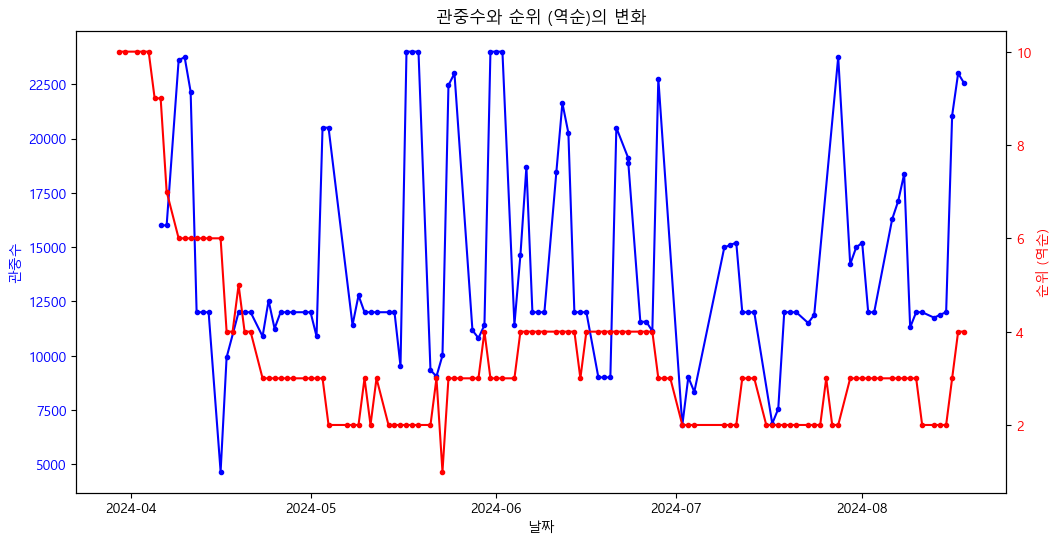

In [120]:
# 데이터 정렬 (날짜 기준)
hdcc_slicing = hdcc_slicing.sort_index()
hdata_reverse = hdata_reverse.sort_index()

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 관중수 그래프 (왼쪽 y축)
ax1.plot(hdcc_slicing.index, hdcc_slicing['관중수'], marker='o', linestyle='-', color='b', label='관중수', markersize=3)
ax1.set_xlabel('날짜')
ax1.set_ylabel('관중수', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 순위 (역순) 그래프 (오른쪽 y축)
ax2 = ax1.twinx()
ax2.plot(hdata_reverse.index, hdata_reverse['순위'], marker='o', linestyle='-', color='r', label='순위 (역순)', markersize=3)
ax2.set_ylabel('순위 (역순)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 그래프 제목 설정
plt.title('관중수와 순위 (역순)의 변화')

# 그래프 출력
plt.show()

In [118]:
hdcc_slicing.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 2024-04-06 to 2024-08-18
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   요일      102 non-null    object 
 1   홈       102 non-null    object 
 2   방문      102 non-null    object 
 3   구장      102 non-null    object 
 4   관중수     102 non-null    float64
 5   변화율     102 non-null    float64
 6   롤링 변화율  102 non-null    float64
dtypes: float64(3), object(4)
memory usage: 6.4+ KB
